In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

# ABC Multistate Bank Customer Churn Prediction 🏦

Welcome to the world of ABC Multistate Bank's data! This dataset presents a treasure trove of information about the bank's customers and their interactions. Our mission? To predict customer churn, the phenomenon where a client bids adieu to the bank during a specific period.



In [48]:
path = './Bank Customer Churn Prediction.csv'
churn_df = pd.read_csv(path)

## A Guided EDA Process 🚀🔍

Exploratory Data Analysis (EDA) is an essential step in any data science project, helping us understand, clean, and gain insights from our dataset. Here's a structured EDA process to guide your data exploration:

1. **Understand Column Meanings:** Begin by comprehending the meaning of each column in your dataset. Know what each attribute represents and its significance in your analysis. This provides context for your data.

2. **Check Data Integrity:** Ensure the integrity of your dataset by inspecting for missing values (NaNs) and outliers. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions:** Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.

4. **Pair Plots for Relationships:** Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

## Understand Column Meanings 📊

In [49]:
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dataset Description 📗

Here is a more detailed explanation of each feature:

- **customer_id**: A unique identifier (currently sitting on the sidelines).
- **credit_score**: A numerical assessment, telling us about the customer's creditworthiness.
- **country**: Where in the world the customer hails from.
- **gender**: The gender of our esteemed clients.
- **age**: Age, a number that never grows old in data analysis.
- **tenure**: The duration of their relationship with the bank in years.
- **balance**: The state of their financial affairs in €.
- **products_number**: How many bank products they've embraced.
- **credit_card**: Do they wield the power of plastic?
- **active_member**: Are they actively engaging with the bank?
- **estimated_salary**: An estimate of their annual salary.
- **churn**: Our target variable. It's 1 if they've bid us farewell, 0 if they're staying by our side.



## Check Data Integrity 🔍

In [50]:
# Check for missing values
missing_values = churn_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


We are good to go! No missing values.

## Visualize Distributions 📈

<Axes: xlabel='churn', ylabel='Count'>

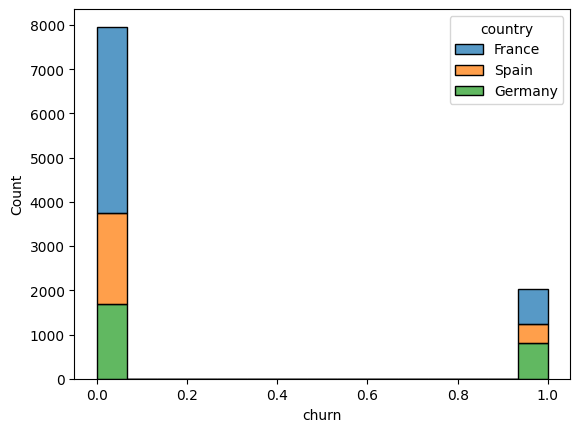

In [51]:
# Select the column you want to analyze
column_to_analyze = 'churn'

sns.histplot(churn_df, x = column_to_analyze, hue='country', multiple = 'stack')

## Pair Plots for Relationships 🔄

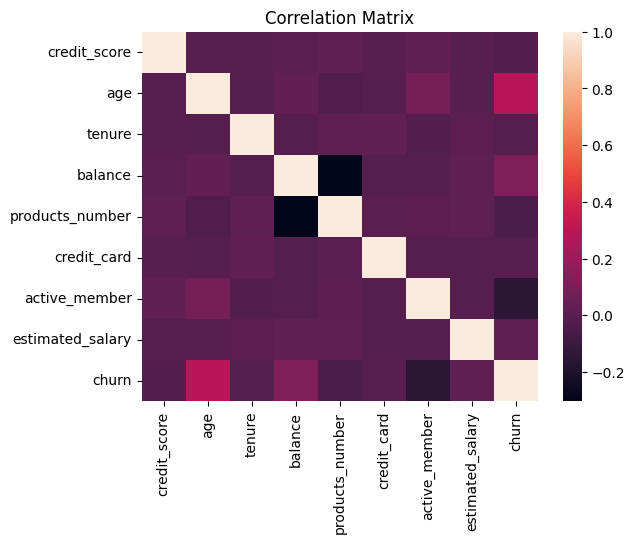

In [52]:
fig, ax = plt.subplots()

ax = sns.heatmap(churn_df.drop('customer_id', axis=1).corr(numeric_only=True))
ax.set_title('Correlation Matrix')

fig.show()

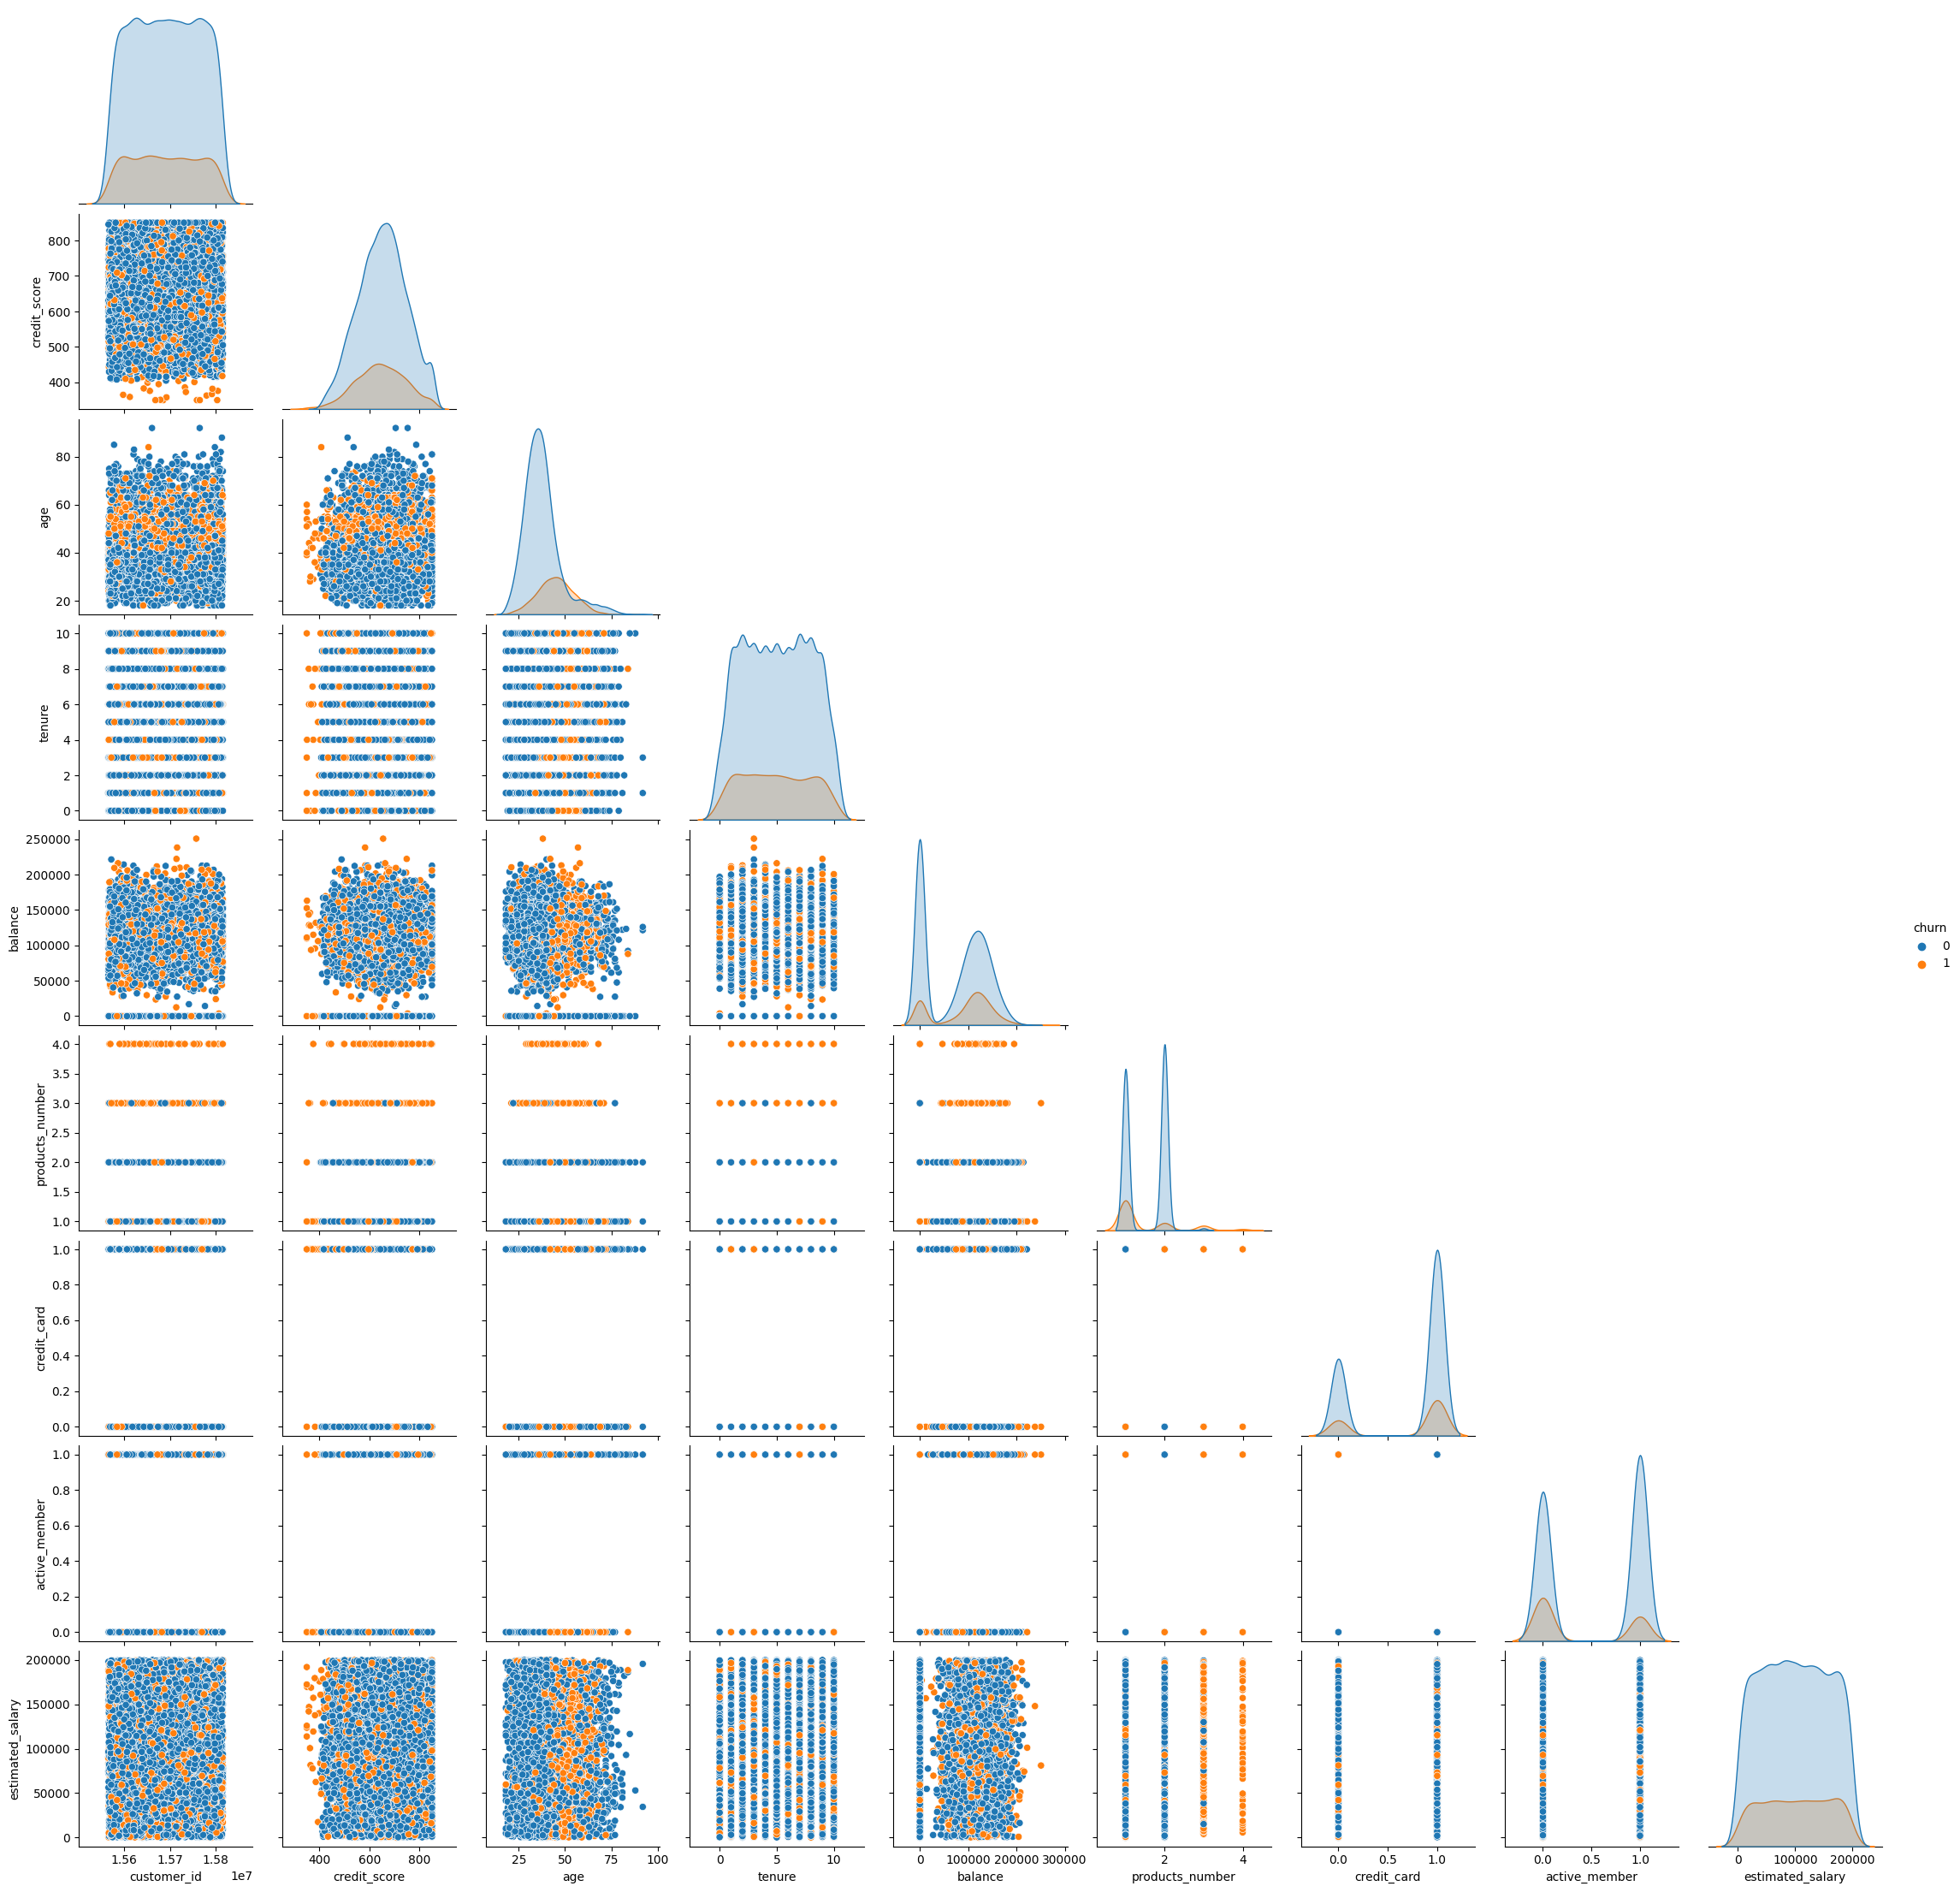

In [53]:
sns.pairplot(churn_df, hue='churn', corner=True)

# Preprocessing ⚙️

Preprocessing is the process of preparing raw data for machine learning. It is an essential step in any machine learning project, as it can help to improve the performance and accuracy of your model.

The goal of preprocessing is to transform the raw data into a format that is more suitable for machine learning algorithms. This may involve cleaning the data, handling missing values, encoding categorical features, and scaling numerical features.

## Splitting the Dataset into Train and Test Set 🔪

Splitting the dataset into a train and test set is an important step in machine learning. The train set is used to train the model, and the test set is used to evaluate the performance of the trained model on unseen data.

This is important because it helps to prevent overfitting. Overfitting occurs when a model learns the training data too well and is unable to generalize to new data.

A common split ratio is 80/20, meaning that 80% of the data is used for the train set and 20% of the data is used for the test set.

Here is an example of how to split the dataset into a train and test set using scikit-learn:



In [54]:
from sklearn.model_selection import train_test_split

X = churn_df.drop('churn', axis=1)
y = churn_df['churn']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (8000, 11), y_train shape: (8000,)
X_test shape: (2000, 11), y_test shape: (2000,)


## Distribution of Target Variable Across Different Sets 📊

In our quest to create a robust model, it's crucial to ensure that the distribution of the target variable is harmonious across multiple sets. We want to maintain balance and equilibrium among the original dataset, the training set, and the test set to steer our model in the right direction! 🚀💼

Let's dive in and make sure everything's in perfect alignment. 🌟📈






In [55]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")


Distribution of y (Original Dataset):
Class 0: 7963 samples
Class 1: 2037 samples
Ratio: 0.2037

Distribution of y_train (Training Set):
Class 0: 6356 samples
Class 1: 1644 samples
Ratio: 0.2055

Distribution of y_test (Test Set):
Class 0: 1607 samples
Class 1: 393 samples
Ratio: 0.1965


We have to make sure that the distribution of the target classes are respected among the dataset.
For this reason, we introduce...

## Stratification: Splitting the Dataset with Distribution Consideration 🧩

In machine learning, it's essential to maintain a balanced distribution of the target variable when splitting the dataset into training and testing sets. This helps ensure that the model is properly trained and evaluated across all classes. To achieve this, we'll perform a **stratified** split, where the proportions of each class in the original dataset are preserved in both the training and testing sets.

Let's proceed to split the dataset while respecting the distributions.


In [56]:
from sklearn.model_selection import train_test_split

# Perform a stratified split to maintain target variable distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Shapes of the split datasets:
X_train shape: (8000, 11), y_train shape: (8000,)
X_test shape: (2000, 11), y_test shape: (2000,)


In [57]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")


Distribution of y (Original Dataset):
Class 0: 7963 samples
Class 1: 2037 samples
Ratio: 0.2037

Distribution of y_train (Training Set):
Class 0: 6370 samples
Class 1: 1630 samples
Ratio: 0.20375

Distribution of y_test (Test Set):
Class 0: 1593 samples
Class 1: 407 samples
Ratio: 0.2035


## Putting all together 🤲

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode the categorical variables
churn_df_dummies = pd.get_dummies(churn_df, columns=['country', 'gender'])

#"credit_card","customer_id", "estimated_salary","tenure","credit_score"
#"products_number","country_France","country_Spain","country_Germany"
#"gender_Male","gender_Female","balance","age","active_member"
X = churn_df_dummies.drop(['churn'], axis=1)
y = churn_df_dummies['churn']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Logistic Regression 📈
Logistic Regression (LogR) is another widely used machine learning algorithm with a different purpose compared to Linear Regression. While Linear Regression predicts continuous numeric values, Logistic Regression is designed for binary classification tasks. It's used when the target variable is categorical and has only two classes. 🧮

## When to Use Logistic Regression?
Logistic Regression is a suitable choice when you want to:

1. Perform Binary Classification: It's ideal for scenarios where you need to classify data into one of two categories, such as spam or not spam, churn or not churn, and yes or no decisions. 📊
2. Probability Estimation: LogR provides probabilities of class membership, which can be useful in cases where you want to understand the likelihood of an event happening.
3. Assumptions: Like Linear Regression, Logistic Regression has its own set of assumptions, including linearity, independence of errors, and lack of multicollinearity. Adherence to these assumptions is crucial for model reliability.

## Using scikit-learn's LogisticRegression
In Python, scikit-learn (sklearn) offers a robust library for building machine learning models, including Logistic Regression. Here's how to use the LogisticRegression class:

In [59]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the standardized data
logistic_model.fit(X_train, y_train)


LogisticRegression()

# Evaluating Performance for Logistic Regression 📊
In machine learning, assessing your model's performance is crucial to determine how effectively it makes predictions on unseen data. Evaluating a Logistic Regression model involves using various metrics to measure its performance:

## Accuracy 🎯
Accuracy is a fundamental classification metric that quantifies the proportion of correctly classified instances out of the total instances in your dataset. It measures the model's ability to make accurate predictions. Here's how it's calculated:

1. For each data point, check if the predicted class matches the actual class (0 or 1).
2. Count the number of correctly classified instances.
3. Divide the count by the total number of instances.

Higher accuracy values indicate that the model is making more correct predictions, while lower values suggest classification errors.

## Confusion Matrix 📊
A confusion matrix is a table that summarizes the classification results of a model. It provides insights into the true positive, true negative, false positive, and false negative predictions. Each cell in the matrix represents different classification outcomes, which can be used to calculate metrics like precision, recall, and F1-score.

## Precision, Recall, and F1-Score
Precision, recall, and the F1-score are essential metrics for evaluating the performance of binary classification models like Logistic Regression:

Precision: Measures the proportion of true positive predictions among all positive predictions. It quantifies the model's ability to avoid false positives. 📏

$Precision = {{True Positives} \over (True Positives + False Positives)}$

Recall: Measures the proportion of true positive predictions among all actual positive instances. It quantifies the model's ability to identify positive cases. 🧐

$Recall = {{True Positives} \over (True Positives + False Negatives)}$

F1-Score: Harmonic mean of precision and recall. It provides a balanced measure of a model's performance. 📈


## ROC Curve and AUC
Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) are used to assess a model's ability to distinguish between classes, especially in imbalanced datasets. The ROC curve plots the true positive rate against the false positive rate at different thresholds, and the AUC quantifies the overall performance of the model. 📉

## Purpose of Metrics:

**Accuracy**: It provides a straightforward measure of overall classification performance. Higher accuracy indicates better classification accuracy.

**Confusion Matrix**: It offers a detailed view of the model's performance, helping identify the types of classification errors.

**Precision**: It emphasizes the importance of minimizing false positives, making it useful in scenarios where false positives are costly.

**Recall**: It emphasizes the importance of identifying all positive instances, making it valuable when missing positive cases is undesirable.

**F1-Score**: It provides a balanced measure of precision and recall, considering both false positives and false negatives.

**ROC Curve and AUC**: These metrics evaluate the model's ability to discriminate between classes, especially in situations with imbalanced data.

By measuring these metrics, you gain insights into the Logistic Regression model's performance, helping you assess its strengths and areas for improvement.


Accuracy: 0.81
Confusion Matrix:
 [[1543   64]
 [ 315   78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

ROC AUC: 0.78
Average Precision: 0.47


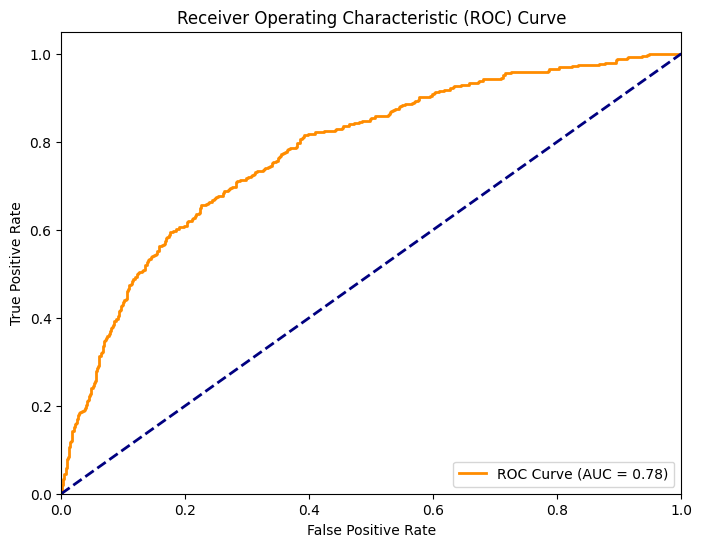

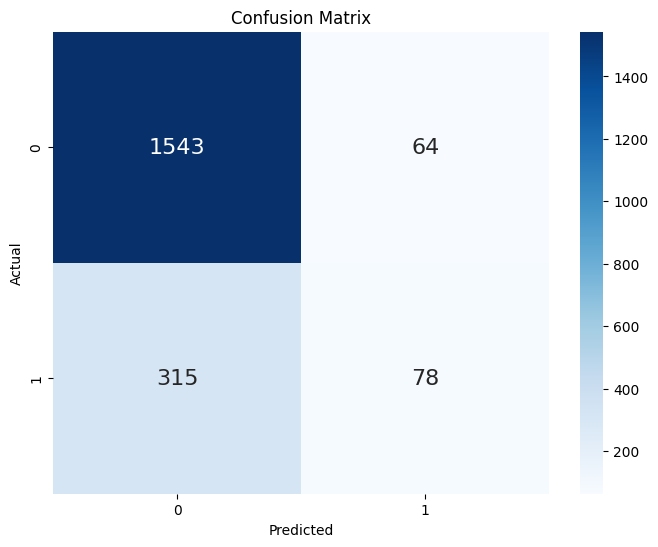

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Make predictions using the trained Logistic Regression model
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Calculate ROC curve and AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
print(f'Average Precision: {average_precision:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Evaluating the Importance of Features 📊

In the world of machine learning, understanding which features (variables) are the most influential in a model is crucial for making informed decisions. Feature importance analysis helps us identify the key drivers behind our model's predictions. In this section, we'll explore a method to evaluate and visualize the importance of features, particularly in the context of a logistic regression model.

## Why Assess Feature Importance?
Assessing feature importance serves several essential purposes:

1. **Model Interpretability**: It helps us comprehend which features contribute most to the model's decision-making process, making our model more interpretable.
2. **Feature Selection**: We can decide whether to include, exclude, or engineer specific features based on their importance.
3. **Understanding Relationships**: It provides insights into the relationships between features and the target variable.
4. **Model Optimization**: Identifying unimportant features can lead to more efficient models and faster training times.

## Visualizing Feature Importance
We'll use a snippet of Python code to visualize feature importance, which can be applied to various machine learning models. This code will create a horizontal barplot, where feature labels are displayed on the y-axis, and the magnitude of their coefficients or importance values on the x-axis. The bars are sorted in descending order, with the most important features at the top.

Let's dive into the code and see how it helps us gain insights into our logistic regression model's feature importance.


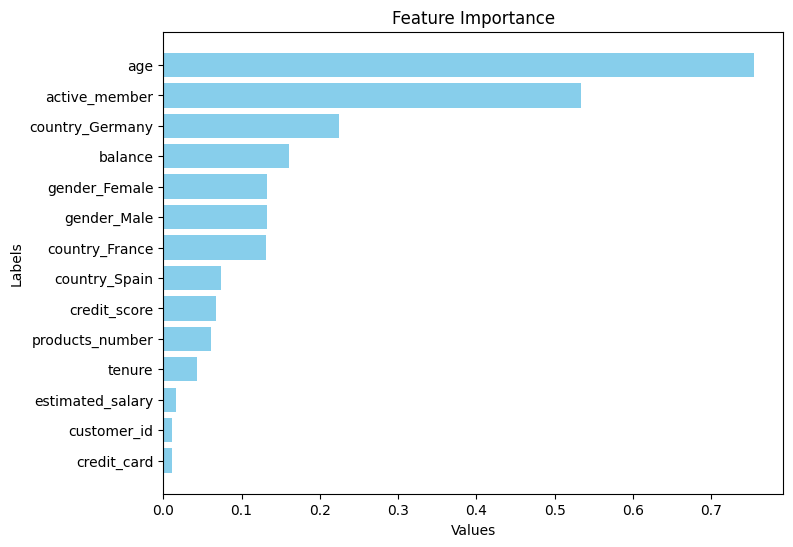

In [61]:
coefficients = np.abs(logistic_model.coef_[0])
feature_names = X.columns
coef_importance = list(zip(feature_names, coefficients))
coef_importance.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*coef_importance)
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Labels')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top feature at the top
plt.show()
